In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from math import comb
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2
active = relu

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = norm
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=sphere)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
ns = np.arange(10, 500, 10)

# Dense features

## No ensemble

In [6]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[0.0007252837993999093, 0.00043451622354414107, 0.00033644742702528435, 0.00030126100141396995, 0.00029131959853362225, 0.0002952434365002214, 0.0004931437844283521, 0.00043876049016671853, 0.00025482742102223536, 0.00021020881855460667, 0.00017937585089659847, 0.00015461116173532346, 0.00013890404794188242, 0.00013396314614098613, 0.00011840585247737594, 0.00011429781222455266, 0.00010536588617529843, 0.00010238316600229527, 9.738626305700289e-05, 9.485781886890204e-05, 9.20482062730065e-05, 8.534178829604191e-05, 8.421777880268979e-05, 8.107947088089215e-05, 7.67773186343456e-05, 7.807159050891167e-05, 7.368316021770307e-05, 7.156878236405153e-05, 6.938418232859361e-05, 6.852397654378103e-05, 6.79650556508237e-05, 6.519285816457897e-05, 6.476074614279415e-05, 6.660230309000327e-05, 6.332534894441115e-05, 6.300391527699697e-05, 5.822928963641451e-05, 6.185106608433169e-05, 5.774400486779925e-05, 5.8008448235035654e-05, 5.381557881880375e-05, 5.5521175963762454e-05, 5.343066241286392e-

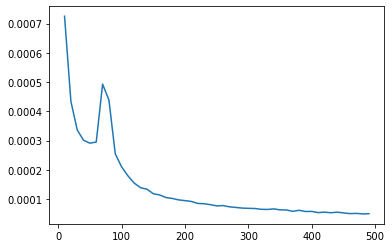

In [7]:
print([np.mean(res) for res in results_l2_dense])
plt.plot(ns, [np.mean(res) for res in results_l2_dense])

In [8]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[0.0007859978021925484, 0.0004224155394900223, 0.0003262959382029468, 0.0002960456066841914, 0.0002985845406299646, 0.00029797985905028764, 0.0004439801987248885, 0.0005963483483754057, 0.00043472275671921373, 0.00035463144816088086, 0.00031555698126103205, 0.00028661702129122483, 0.00026860497890687774, 0.0002606137038577762, 0.00024699652864174527, 0.00024397219856052733, 0.00022801460950020455, 0.00022521833793423323, 0.00023287540415077912, 0.00023128646835960195, 0.000222741484689777, 0.0002189715030458407, 0.00020374861404841424, 0.0002057249900063022, 0.00021072904126435721, 0.00020911811269056342, 0.00020253606921662518, 0.00019773803281839393, 0.00019645661705867246, 0.00021233305691327657, 0.00020220768985622465, 0.0001939937079707989, 0.00019710687284597988, 0.00020167121991972108, 0.0001964797705175552, 0.00018832689121219248, 0.00019486363051752202, 0.00019361031607820868, 0.00019158608427837263, 0.00018530881564790764, 0.00018497160864687983, 0.0001891138456603099, 0.0001

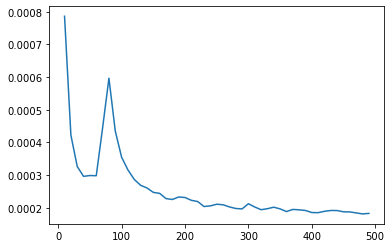

In [9]:
print([np.mean(res) for res in results_wl2_dense])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense])

## Ensemble

In [10]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.005535678981221098, 0.004091638890386909, 0.003720761098674412, 0.003730983226579147, 0.003649179833660833, 0.0033649701163911833, 0.003322714946248255, 0.003324295563639773, 0.0033911099122658885, 0.0033142547588884998, 0.003234930046940121, 0.003462718172962881, 0.00339861135231649, 0.00318194885420044, 0.0032425024756095023, 0.003249156882656584, 0.0032589434326400464, 0.003383941226525514, 0.003149564515369007, 0.0032433803197273853, 0.0032767025923066675, 0.00317452439658806, 0.003208919199762393, 0.0032510777242731144, 0.003212990243706924, 0.003256327682550199, 0.0031452884438466513, 0.0031959067134960362, 0.0032032437476003997, 0.003192745250601925, 0.003200073102960859, 0.003166736284703307, 0.0031708825338761294, 0.0031706073518831487, 0.0032025168584280906, 0.0031729324511350085, 0.0032084795935653056, 0.003256407547397525, 0.0031563401087237805, 0.0032061687021238293, 0.0032409783316938736, 0.0031353630904681707, 0.003198283594957816, 0.003238708586116897, 0.003162135894

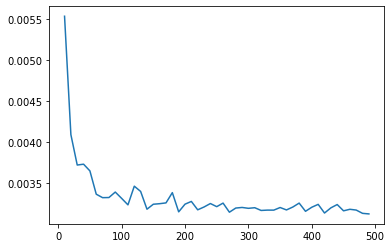

In [11]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [12]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.004750848255745106, 0.003982045833196655, 0.0037210949513199884, 0.0036104816544385012, 0.003349275758652857, 0.0033892539113846336, 0.0033669426887506363, 0.0032812156030714986, 0.0033517912556393714, 0.003391141112983995, 0.0033469047740853457, 0.0032772143815888223, 0.0032735730083786213, 0.003172655362306198, 0.003221136011674655, 0.0031792696012172064, 0.0032304937454557905, 0.0032251888351517697, 0.0032168468301262713, 0.003235828559448427, 0.0032374075188780953, 0.0032578091201468915, 0.003238169074802081, 0.0032392526128719066, 0.0032128290755027667, 0.0032040178475957514, 0.003192486793888604, 0.003155714086028688, 0.0031469457892540015, 0.003176181899513574, 0.0032247933573662777, 0.0031903677900864957, 0.003140473745411788, 0.003207026476512308, 0.003106838378959674, 0.003151840712278775, 0.003208878290469685, 0.0032596837538971615, 0.003222317446860125, 0.0032009000717380595, 0.0031098529091803046, 0.0031460727525961856, 0.003204796831757106, 0.003177138474510943, 0.0032

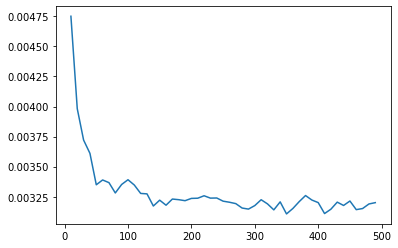

In [13]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [14]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[0.001424018340833535, 0.0014637782527011523, 0.0015769391063391407, 0.00186722970755104, 0.13308063819599014, 0.007386479633607989, 0.009926633269807975, 0.007684195615628188, 0.00510301787595101, 0.004174082064648079, 0.0037535280722191242, 0.003446409325570647, 0.00320861618273145, 0.0032516769811817533, 0.003081879851978035, 0.003032596197273056, 0.003072356342723527, 0.0028592501752897374, 0.002881712975816391, 0.0027826159847343782, 0.002767736995868248, 0.002821975477431593, 0.002799816658848307, 0.0027286162916580503, 0.0027157854505004816, 0.002659257878875205, 0.0027517705532938952, 0.0026486875903915246, 0.00269733416247822, 0.002698660474995348, 0.002657359623146131, 0.0026051116583621857, 0.0025996142177644394, 0.0027088707997426006, 0.002609563279710919, 0.002617868751626399, 0.0026092414699569245, 0.0025417798233850594, 0.0025475349602832173, 0.002582770996490181, 0.0025084760683132495, 0.002563549414329943, 0.002573433460946067, 0.002519726410455763, 0.00255117998490419

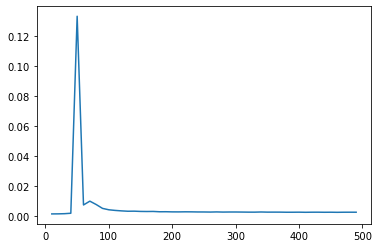

In [15]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [16]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[0.0014015784324808102, 0.0014593086306685138, 0.0014759236773950618, 0.0018296666823182494, 0.001821197439745741, 0.002262360507124706, 0.005307395474886357, 0.0030360812674619783, 0.0052759959618787515, 0.0019594351098894507, 0.0044078330061450115, 0.003593950772777248, 0.0047583467496865066, 0.004197609144236893, 0.003478292969678432, 0.0041730301046898855, 0.004061792696348355, 0.0035906992603605913, 0.0023203061751130016, 0.003571523284926633, 0.00396325912469985, 0.003383432313947319, 0.0030727181003081397, 0.004349636175784693, 0.0030953557278261983, 0.0022320238976664747, 0.0045019375279117925, 0.002044983014652186, 0.0031953028741012425, 0.0030437064898777106, 0.004052505903752799, 0.003963616678732245, 0.0035164436087386586, 0.0026475831706042575, 0.002934180368715385, 0.0026916960364046813, 0.0030699107109660555, 0.003972434458741994, 0.003867837396554262, 0.004201033539362389, 0.0034205533294755534, 0.0034270419985177507, 0.0031899154614834545, 0.004056063980970141, 0.00360

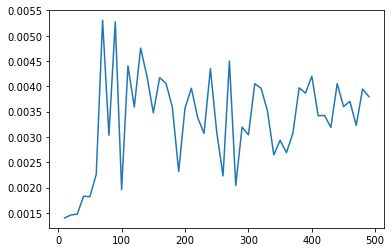

In [17]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [18]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.004769675649356268, 0.004402255697170641, 0.004011685744145057, 0.0039152149338934645, 0.0038723794368454327, 0.0036593404349331117, 0.003887895249819915, 0.0036340830283445604, 0.003643764345254174, 0.0036354188866710964, 0.003692352329914636, 0.003665200870436856, 0.003493405282515677, 0.0034823535530647694, 0.0034953304070743387, 0.0035250493833633356, 0.0035918853376768374, 0.0035822792520524894, 0.0034971158651406313, 0.003557851452217254, 0.003468752200228595, 0.003467736151661175, 0.0034149598975503582, 0.0034624457101032936, 0.0034699389581320335, 0.003481905494594046, 0.003479680583455999, 0.0035102570458997043, 0.0034927208506131168, 0.0034470225400925216, 0.0034867256835753617, 0.0034685245637360363, 0.0034821025981899368, 0.003469857754543077, 0.003478290379513102, 0.0034749404947698056, 0.0034914404667224066, 0.003491284766595088, 0.0034851030577252987, 0.0034652797626822654, 0.0033986101229274966, 0.0034497176751693706, 0.003455432675747175, 0.003445235282769625, 0.003

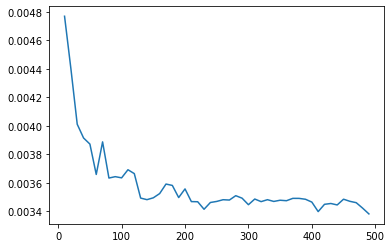

In [19]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [20]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.004981932910693615, 0.004167773297575537, 0.003858768953280764, 0.003961403965788855, 0.003900345162222721, 0.003605375292154491, 0.003589117173709655, 0.003647242498687622, 0.003619041978614494, 0.003545414814206359, 0.003531105129438035, 0.0035643213412226106, 0.0035527648951396372, 0.0035679229641606275, 0.0035704349913716093, 0.003536612367852477, 0.003563908593583835, 0.0035581584760913535, 0.003580088220368544, 0.0035044954445955304, 0.0034377798583885427, 0.0034938723396402394, 0.00351811761120095, 0.003493792716203274, 0.003523026816056507, 0.003482223808479637, 0.0034941710435035475, 0.003382062246577612, 0.003456319117562282, 0.0035396255065581355, 0.0034643661355947715, 0.0035385301954871536, 0.0034733237589168464, 0.0034667278390132623, 0.003494089387111994, 0.003439223894512392, 0.003497171585803398, 0.0034728110020369523, 0.0034449325543754955, 0.0034652047119580636, 0.0034554106663921003, 0.0034331230263878166, 0.003442909804684046, 0.0034683079093421687, 0.0034550325

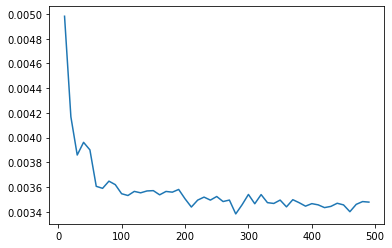

In [21]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])